# This first block imports the libraries that we will use to analyze the data.

In [4]:
# Cell 1: Import libraries and read data
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../data/processed/CleanedEnrollmentData2022.csv')

# Display the first few rows of the dataframe
print(df.head())

                                   IPEDS_Race  Year  Enrollment  \
0                                       Asian  2022       35689   
1                   Black or African American  2022      112349   
2  Native Hawaiian or Other Pacific Islanders  2022        2044   
3                          Hispanic or Latino  2022      117930   
4                           Two or More Races  2022       33749   

               University     share  
0  Baccalaureate Colleges  0.043736  
1  Baccalaureate Colleges  0.137682  
2  Baccalaureate Colleges  0.002505  
3  Baccalaureate Colleges  0.144521  
4  Baccalaureate Colleges  0.041359  


In [6]:
# Cell 2: Data Preparation
# Group the data by University and IPEDS_Race, summing the Enrollment
grouped_data = df.groupby(['University', 'IPEDS_Race'])['Enrollment'].sum().unstack()

# Calculate the percentage for each race within each university
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Display the percentage data
print(percentage_data)

# save the data to a csv file
percentage_data.to_csv('../data/processed/PercentageData2022.csv')

IPEDS_Race              American Indian or Alaska Native     Asian  \
University                                                           
Baccalaureate Colleges                          0.776221  4.373625   
Berea College                                   0.000000  3.889675   

IPEDS_Race              Black or African American  Hispanic or Latino  \
University                                                              
Baccalaureate Colleges                  13.768175           14.452117   
Berea College                           18.670438           15.417256   

IPEDS_Race              Native Hawaiian or Other Pacific Islanders  \
University                                                           
Baccalaureate Colleges                                    0.250489   
Berea College                                             0.070721   

IPEDS_Race              Non-resident Alien  Two or More Races      White  
University                                                            

<Figure size 1200x600 with 0 Axes>

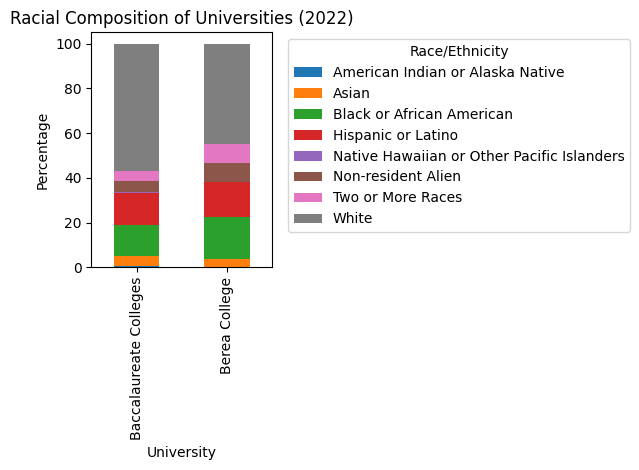

<Figure size 640x480 with 0 Axes>

In [11]:

# Cell 3: Visualization 1 - Bar Chart Comparison
plt.figure(figsize=(12, 6))
percentage_data.plot(kind='bar', stacked=True)
plt.title('Racial Composition of Universities (2022)')
plt.xlabel('University')
plt.ylabel('Percentage')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# save to DiversityInStem/results/figures
plt.savefig('../results/figures/BarChartRacialComposition2022.png')

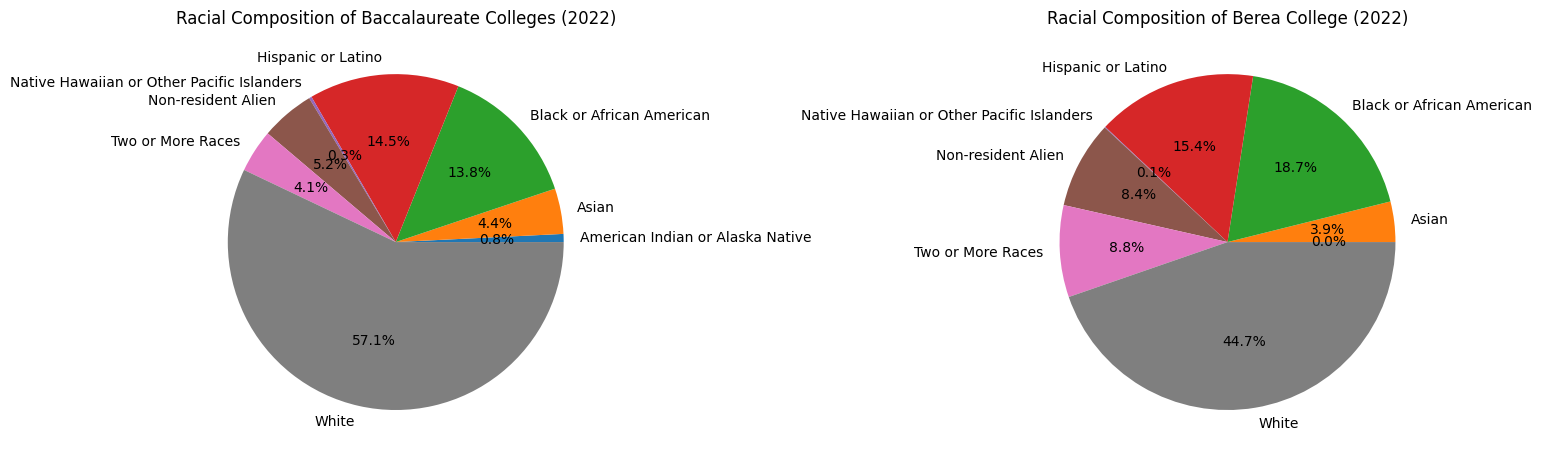

In [8]:
# Cell 4: Visualization 2 - Pie Charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart for Baccalaureate Colleges
percentage_data.loc['Baccalaureate Colleges'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Racial Composition of Baccalaureate Colleges (2022)')
ax1.set_ylabel('')

# Pie chart for Berea College
percentage_data.loc['Berea College'].plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Racial Composition of Berea College (2022)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

## Horizontal Bar Chart

In [ ]:
# Cell 5: Visualization 3 - Horizontal Bar Chart for Comparison
plt.figure(figsize=(10, 8))
percentage_data.plot(kind='barh', stacked=True)
plt.title('Racial Composition Comparison (2022)')
plt.xlabel('Percentage')
plt.ylabel('University')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()